# Plotagem

O Matplotlib oferece duas formas principais de criar gráficos: **maquina de estado** e **interface orientada a objetos (OO)**. Neste tópico, vamos explorar o conceito da interface **OO**. Essa aboradaem era usada em versões anteriores do Maplotlib

- **Maquina de estado**: É uma abordagem mais simples, onde você cria gráficos diretamente com funções como `plt.plot()`, sem a necessidade de criar explicitamente figuras e eixos.

- **Interface orientada a objetos (OO)**: Neste caso, você cria explicitamente uma figura (`fig`) e um eixo (`ax`), e a partir desses objetos, configura o gráfico. Essa abordagem é mais poderosa e flexível, permitindo um maior controle sobre os elementos do gráfico.


Devido ao fato de se ter mais controle a todos os ambientes de um figura, em aplicações deixamos o nível "Maquina de estado" de lado e focaremos apenas na interface orientada a objetos.

Vamos argumentar melhor sobre isso abaixo, mas antes vale lembrar que sempre que iniciamos um novo arquivo jupyter e o kernel estiver zerado (nada tiver sido compilado) necessitamos compilar os módulos que necessitamos importar:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Maquina de Estado

`plot()` é o comando mais básico. Aqui também vemos que podemos usar a notação LaTeX para os eixos

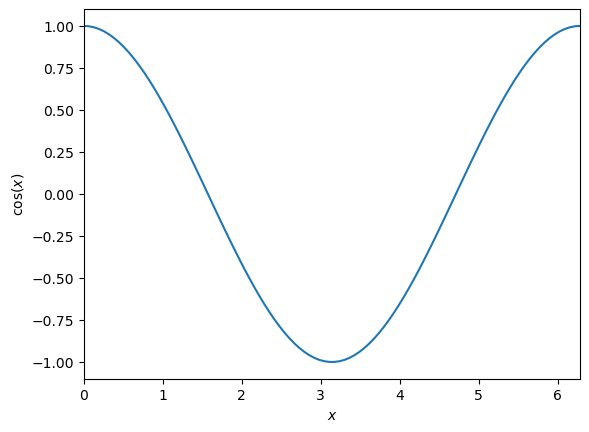

In [ ]:
x = np.linspace(0, 2*np.pi, 100)
y = np.cos(x)

plt.plot(x, y)  # Plota diretamente, sem necessidade de criar 'fig' e 'ax'
plt.xlabel(r"$x$")  # Define o rótulo do eixo x
plt.ylabel(r"$\cos(x)$")  # Define o rótulo do eixo y
plt.xlim(0, 2*np.pi)  # Define os limites do eixo x
plt.show()  # Exibe o gráfico (no jupyter não precisa desse comando)

Observe que, quando usamos o comando `plot()` dessa forma, o matplotlib cria automaticamente uma figura e um eixo para nós e desenha o gráfico neles. Esta é a interface de _máquina de estados_.

## Interface Orientade a Objetos (OO) 

O estilo OO é recomendado para quando você precisa de mais controle sobre o gráfico ou quando trabalha com múltiplos gráficos e subgráficos.

Na interface Orientade a Objetos temos que:

1. Criamos primeiramente a figura com `fig = plt.figure()`
2. Depois criamos os eixos (subplots) que queremos trabalhar (No caso de apenas uma imagem `ax = fig.add_subplot(111)`)
3. Assim com a figura e os eixos criados, podemos finalmente fazer o gráfico selecionando em qual eixo deve utilizar.
4. Por fim, podemos editar propriedades dos eixos.
5. Colocar o comando `plt.show()` para exibir o gráfico.

In [ ]:
fig = plt.figure() # Criando a Figura (A tela que iremos pintar nosso gráfico)
ax = fig.add_subplot(111) # Criando o eixo

ax.plot(x, y) # Fazendo o gráfico no eixo criado anteriormente
ax.set_xlabel("$x$") # Colacanndo um rotulo para o eixo x
ax.set_ylabel("$\cos(x)$") # Colacanndo um rotulo para o eixo x
ax.set_xlim(0, 2*np.pi) # Definido o intervalo do eixo x

plt.show()

(0.0, 6.283185307179586)

Em vez de criar uma figura e adicionar um subplot (o eixo) separadamente como fizemos com `fig = plt.figure()` e `ax = fig.add_subplot(111)`, o Matplotlib também oferece uma forma mais prática e concisa de criar tanto a figura quanto os eixos ao mesmo tempo, usando o comando `plt.subplots()`.


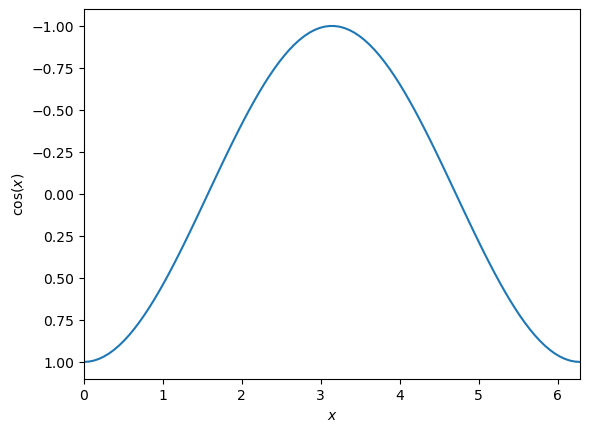

In [ ]:
fig, ax = plt.subplots( )

ax.plot(x, y)
ax.set_xlabel("$x$") # Colacanndo um rotulo para o eixo x
ax.set_ylabel("$\cos(x)$") # Colacanndo um rotulo para o eixo x
ax.set_xlim(0, 2*np.pi) # Definido o intervalo do eixo x
ax.set_ylim(1.1,-1.1)

plt.show()

```{admonition} Exercício Rapído

Podemos plotar 2 linhas em um gráfico simplesmente chamando o comando `plot` duas vezes. Faça um gráfico com `sin(x)` e `cos(x)` desenhados.

```

Observe que os códigos dos exemplos na versão maquina de estados e na interface orientada a objetos são muitos parecidos. A peergunta que surge então é:

_Por que ter duas formas de fazer o mesmo gráfico?_

Para exemplos simples como este, a versão básica do *pyplot* é suficiente. No entanto, frequentemente acabamos criando os mesmos gráficos para diferentes conjuntos de dados, com apenas pequenas modificações. Nesses casos, a interface orientada a objetos se torna mais vantajosa, pois oferece mais recursos e é mais fácil de manter.


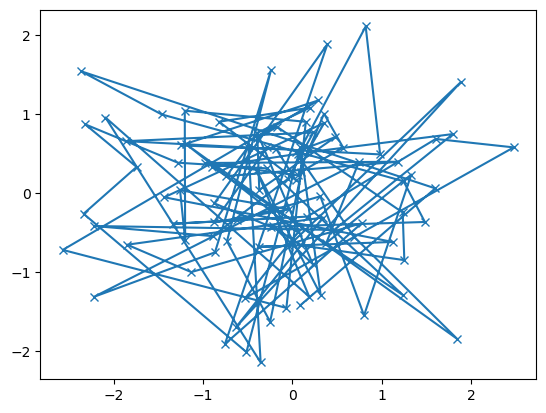

In [ ]:
def meu_plotador(ax, dados1, dados2, dict_parametros):
    """
    Função auxiliar para criar um gráfico.

    Parâmetros
    ----------
    ax : Axes
        Os eixos onde o gráfico será desenhado

    dados1 : array
       Os dados para o eixo x

    dados2 : array
       Os dados para o eixo y

    dict_parametros : dict
       Dicionário com parâmetros adicionais a serem passados para ax.plot

    Retorna
    -------
    saída : list
        Lista de "artistas" adicionados (elementos visuais do gráfico)
    """
    saída = ax.plot(dados1, dados2, **dict_parametros)  # Plota os dados nos eixos 'ax' com os parâmetros dados
    return saída  # Retorna a lista de "artistas" gerados (elementos visuais)

# Que seria utilizado da seguinte forma:

dados1, dados2, dados3, dados4 = np.random.randn(4, 100)  # Gera 4 arrays de números aleatórios
fig, ax = plt.subplots(1, 1)  # Cria a figura e os eixos para o gráfico
meu_plotador(ax, dados1, dados2, {'marker': 'x'})  # Chama a função 'meu_plotador' passando os dados e parâmetros

plt.show()

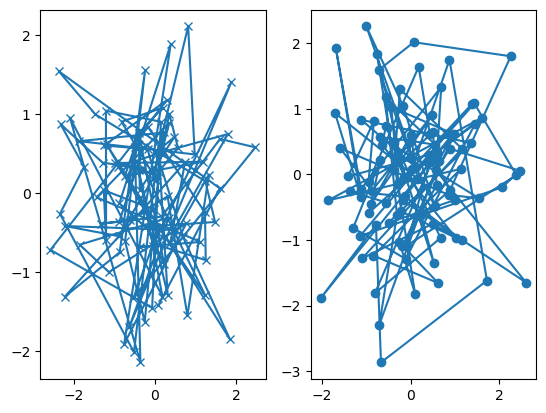

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)
meu_plotador(ax1, dados1, dados2, {'marker': 'x'})
meu_plotador(ax2, dados3, dados4, {'marker': 'o'})

plt.show()

# Formatando o estilo dos gráficos

Vimos no último exemplo que um dos elementos visuais que inserimos foi o marcador. Vamos agora explorar mais esses aspectos visuais do gráfico.

Para isso a partir de agora iremos nos restringir apenas a interface orientada a objetos.

## Strings de Formato

Quando vamos construir um gráfico, podemos usar símbolos em vez de linhas com bastante facilidade também — e rotulá-los. O comando *plot* com *strings* de formatação permite escolher entre gráficos de linhas e de pontos.

Uma string de formato (_format string_) `fmt` é uma maneira conveniente de definir formatação básica como cor, marcador e estilo de linha. 

`fmt = '[marker][line][color]'`

Cada um desses parâmetros é opcional. Por exemplo se a linha for especificada, mas o marcador não for, os dados serão exibidos como uma linha sem marcadores.


Abaixo colocamos as opções possiveis:

<div style="display: flex; justify-content: space-between;">

  <table border="1">
    <caption><strong>Marcadores</strong></caption>
    <tr><th>Caractere</th><th>Descrição</th></tr>
    <tr><td>.</td><td>marcador de ponto</td></tr>
    <tr><td>,</td><td>marcador de pixel</td></tr>
    <tr><td>o</td><td>marcador de círculo</td></tr>
    <tr><td>v</td><td>marcador triângulo_para_baixo</td></tr>
    <tr><td>^</td><td>marcador triângulo_para_cima</td></tr>
    <tr><td>&lt;</td><td>marcador triângulo_esquerda</td></tr>
    <tr><td>&gt;</td><td>marcador triângulo_direita</td></tr>
    <tr><td>1</td><td>marcador triângulo_para_baixo</td></tr>
    <tr><td>2</td><td>marcador triângulo_para_cima</td></tr>
    <tr><td>3</td><td>marcador triângulo_esquerda</td></tr>
    <tr><td>4</td><td>marcador triângulo_direita</td></tr>
    <tr><td>s</td><td>marcador quadrado</td></tr>
    <tr><td>p</td><td>marcador pentágono</td></tr>
    <tr><td>*</td><td>marcador estrela</td></tr>
    <tr><td>h</td><td>marcador hexágono1</td></tr>
    <tr><td>H</td><td>marcador hexágono2</td></tr>
    <tr><td>+</td><td>marcador mais (+)</td></tr>
    <tr><td>x</td><td>marcador x</td></tr>
    <tr><td>D</td><td>marcador diamante</td></tr>
    <tr><td>d</td><td>marcador diamante_fino</td></tr>
    <tr><td>|</td><td>marcador linha_vertical</td></tr>
    <tr><td>_</td><td>marcador linha_horizontal</td></tr>
  </table>

  <table border="1">
    <caption><strong>Estilos de Linha</strong></caption>
    <tr><th>Caractere</th><th>Descrição</th></tr>
    <tr><td>-</td><td>estilo de linha sólida (solid)</td></tr>
    <tr><td>--</td><td>estilo de linha tracejada (dashed)</td></tr>
    <tr><td>-.</td><td>estilo de linha tracejada-ponto (dashdot) </td></tr>
    <tr><td>:</td><td>estilo de linha pontilhada (dotted)</td></tr>
  </table>

  <table border="1">
    <caption><strong>Cores</strong></caption>
    <tr><th>Caractere</th><th>Cor</th></tr>
    <tr><td>b</td><td>azul</td></tr>
    <tr><td>g</td><td>verde</td></tr>
    <tr><td>r</td><td>vermelho</td></tr>
    <tr><td>c</td><td>ciano</td></tr>
    <tr><td>m</td><td>magenta</td></tr>
    <tr><td>y</td><td>amarelo</td></tr>
    <tr><td>k</td><td>preto</td></tr>
    <tr><td>w</td><td>branco</td></tr>
  </table>

</div>

Exemplos de Strings de Formato

- `'b'`    # marcadores azuis com formato padrão
- `'or'`   # círculos vermelhos
- `'-g'`   # linha sólida verde
- `'--'`   # linha tracejada com cor padrão
- `'^k:'`  # marcadores triângulo_para_cima pretos conectados por uma linha pontilhada

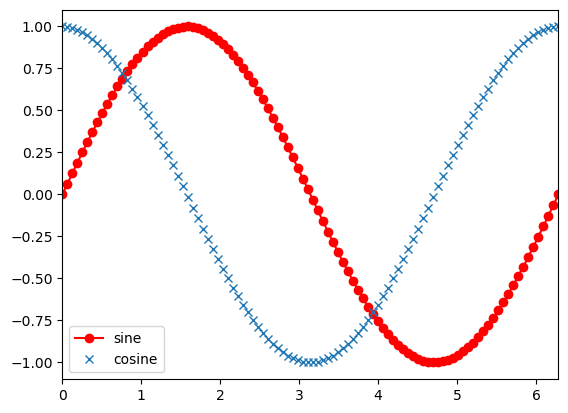

In [ ]:
fig, ax = plt.subplots()

ax.plot(x, np.sin(x), "o-r", label="sine")
ax.plot(x, np.cos(x), "x", label="cosine")
ax.set_xlim(0.0, 2.0*np.pi)
ax.legend() #Esse comando exibe a legenda na figura

plt.show()

Para mais informações consulte a documentação da "string de formato" veja ([https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.plot.html](https://matplotlib.org/3.4.1/api/_as_gen/matplotlib.axes.Axes.plot.html#matplotlib.axes.Axes.plot))


## Line2D

Você pode usar as propriedades do Line2D como argumentos de palavra-chave para controlar melhor a aparência da linha.

Line2D é uma classe do Matplotlib que representa uma linha 2D em um gráfico. Ela oferece várias propriedades que permitem personalizar a aparência da linha, como sua cor, estilo de linha, espessura, marcador, entre outras. Essas propriedades podem ser passadas como argumentos quando você cria um gráfico, ou você pode manipulá-las posteriormente para ajustar a aparência da linha.

Ao usar o **Line2D**, você pode modificar propriedades como `color`, `linestyle`, `linewidth`, `marker` e muito mais, de forma flexível.

- **`color`**: Define a cor da linha. Pode ser especificada por nome (como `'blue'`), código hexadecimal (como `'#FF5733'`), ou abreviações de cor (como `'b'` para azul).

- **`linestyle`**: Controla o estilo da linha. Além dos símbolos, também é possível usar o nome completo em inglês para o estilo da linha. Aqui estão as duas opções (símbolos e nomes completos):

<div style="text-align: center;">

| Símbolo | Nome em Inglês  |
|---------|-----------------|
| `'-'`   | `'solid'`       |
| `'--'`  | `'dashed'`      |
| `':'`   | `'dotted'`      |
| `'-.'`  | `'dashdot'`     |

</div>

- **`linewidth`**: Define a espessura da linha. O valor padrão é 1, mas você pode aumentar ou diminuir conforme necessário (por exemplo, `linewidth=2` para uma linha mais espessa).

- **`marker`**: Define o marcador para os pontos de dados. Exemplos incluem `'o'` para círculos, `'^'` para triângulos para cima, `'*'` para estrelas, entre outros já descritos anteriormente.


As propriedades da linha e o fmt (formato de estilo) podem ser combinados. As duas chamadas a seguir geram resultados idênticos:

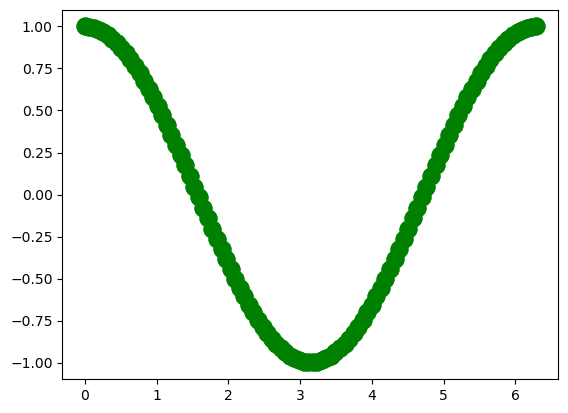

In [ ]:
fig, ax = plt.subplots()

ax.plot(x, y, 'go--', linewidth=2, markersize=12)
ax.plot(x, y, color='green', marker='o', linestyle='dashed', linewidth=2, markersize=12)

plt.show()

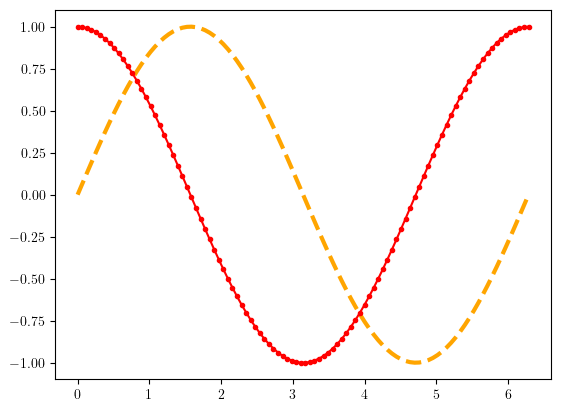

In [ ]:
fig, ax = plt.subplots()

ax.plot(x, np.sin(x), color='orange', linestyle="dashed", linewidth=3.0)
ax.plot(x, np.cos(x), marker = 'o', linestyle="-", color = 'red', markersize = 3)

Existem estilos predefinidos que também podem ser usados. Geralmente, é necessário começar pela criação da figura para que esses estilos tenham efeito.

In [ ]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

Vamos mostrar um exemplo desse estilos pré-definidos usando a interface da maquina de estados

(0.0, 6.283185307179586)

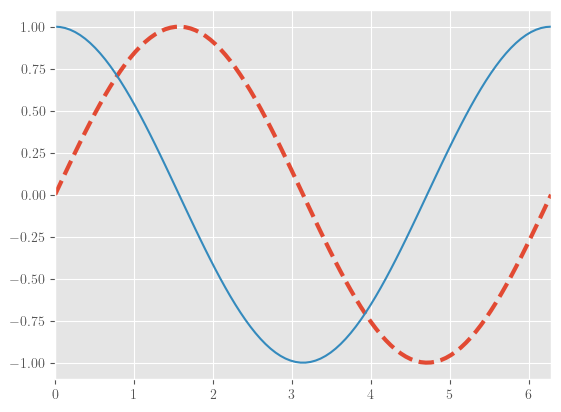

In [ ]:
plt.style.use("ggplot")

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, np.sin(x), linestyle="--", linewidth=3.0)
ax.plot(x, np.cos(x), linestyle="-")
ax.set_xlim(0.0, 2.0*np.pi)

Caso queria retornar a definição original, basta rodar:

In [ ]:
plt.style.use("default")

## Gráficos do Tipo Dispersão e Barra

Para criar gráficos de dispersão, também é possível utilizar o comando `scatter`, que permite definir a cor e o tamanho dos pontos por meio dos argumentos `c` e `s`, respectivamente:

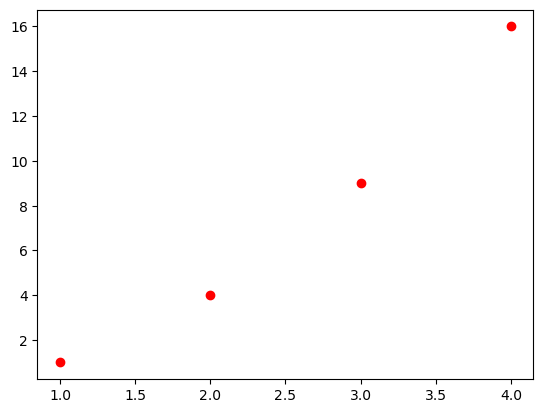

In [ ]:
fig, ax = plt.subplots()

ax.scatter(
    [1, 2, 3, 4], [1, 4, 9, 16], c='r'
)

plt.show()

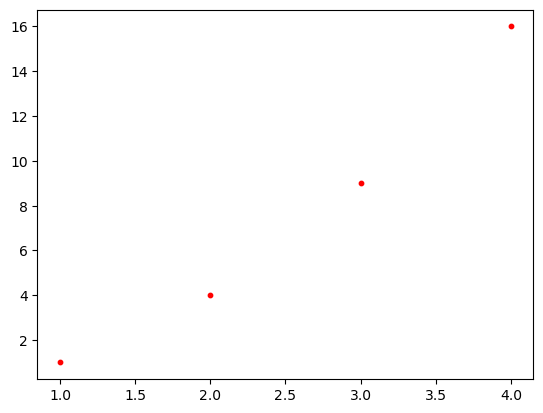

In [ ]:
fig, ax = plt.subplots()

ax.scatter(
    [1, 2, 3, 4], [1, 4, 9, 16], 
    c='r', s=10
)  # pontos menores

plt.show()

Poderiamos ter gerado os mesmos gráficos usando o `plot` com a string `ro`

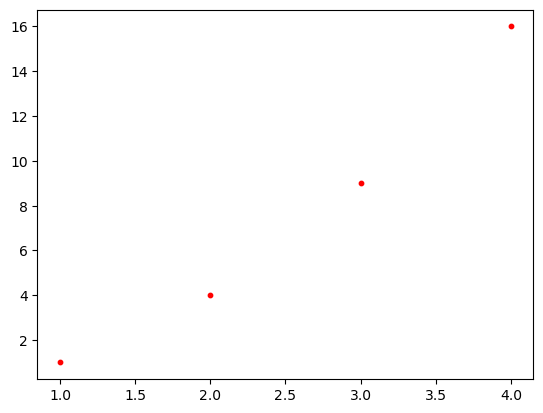

In [ ]:
fig, ax = plt.subplots()

ax.plot(
    [1, 2, 3, 4], [1, 4, 9, 16], 'ro', 
    markersize=np.sqrt(10)
)  # exemplo acima usando plot

plt.show()

### Gráfico de Barras

Podemos também criar gráficos de barras.

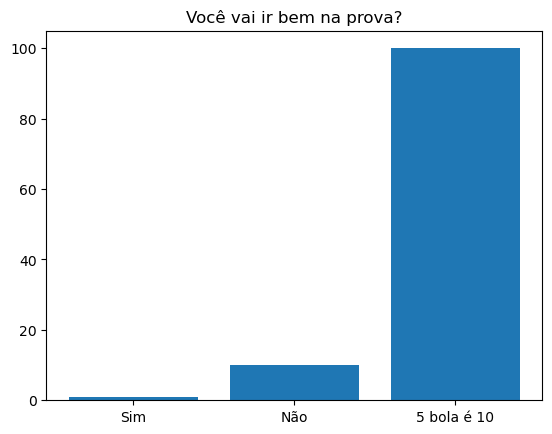

In [ ]:
nomes = ['Sim', 'Não', '5 bola é 10']
valores = [1, 10, 100]

fig, ax = plt.subplots()

ax.bar(nomes, valores) # Criando a tabela

plt.title('Você vai ir bem na prova?') #Colocando Titulo no Gráfico

plt.show()

### Gráfico de Pizza

Também podemos criar gráficos de pizza utilizando  `plt.pie`

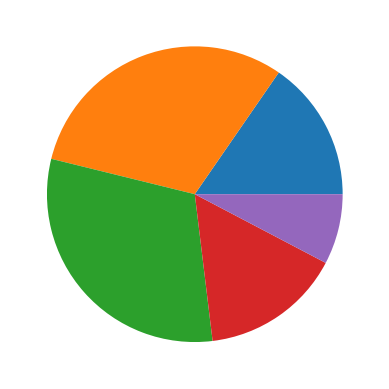

In [2]:
y = [10,20,20,10,5]
plt.pie(y)
plt.show()

Podemos adicionar os nomes da partes passando o conjunto na criação, como argumento labels:

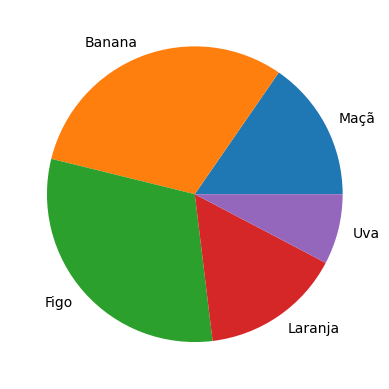

In [3]:
y = [10,20,20,10,5]
nomes = ["Maçã","Banana","Figo","Laranja", "Uva"]
plt.pie(y, labels = nomes)
plt.show()

Usando o parâmetro explode podemos passar um vetor com a porcentagem de distanciamento da fatia em relação ao todo:

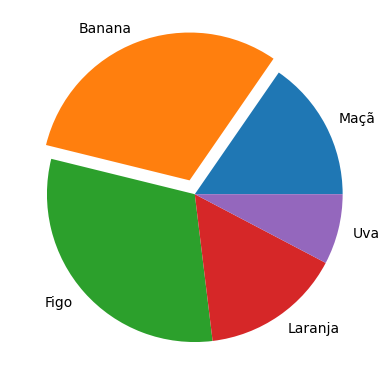

In [4]:
y = [10,20,20,10,5]
explode = (0, 0.1, 0, 0,0)
nomes = ["Maçã","Banana","Figo","Laranja", "Uva"]
plt.pie(y, explode = explode, labels = nomes)
plt.show()

Podemos também exibir as procentagens de cada parte usando `autopct`

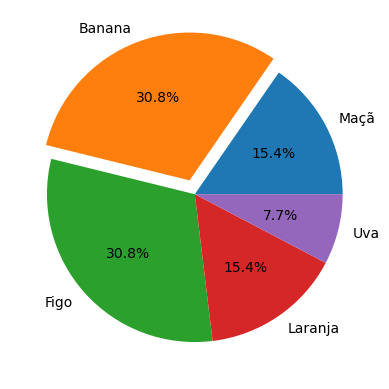

In [ ]:
y = [10,20,20,10,5]
explode = (0, 0.1, 0, 0,0)
nomes = ["Maçã","Banana","Figo","Laranja", "Uva"]
plt.pie(y, explode = explode, labels = nomes, autopct='%.1f%%')
plt.show()


# Múltiplos eixos

Há uma grande variedade de métodos para colocar múltiplos eixos em uma grade. Existem duas formas principais de criar múltiplos gráficos em uma figura utilizando o Matplotlib. Ambas as abordagens permitem dividir a área da figura em subgráficos, mas com algumas diferenças na sintaxe e flexibilidade.

O método **`add_subplot()`** é utilizado para adicionar um conjunto de eixos (ou subgráficos) em uma figura. Isso é útil quando você deseja criar um gráfico com várias subáreas (subgráficos) em uma única janela de figura, o que é comum em visualizações de dados complexos.

Esse método pode receber três parâmetros principais:

1. **Número de Linhas (`nrows`)**: Define quantas linhas de subgráficos você quer na sua figura.
2. **Número de Colunas (`ncols`)**: Define quantas colunas de subgráficos você quer na sua figura.
3. **Índice do Subgráfico (`index`)**: Define qual subgráfico você está acessando (a posição do subgráfico na grade).

Podemos entender os argumentos da seguinte forma:

- **Linhas e Colunas**: A grade de subgráficos é definida por um número de linhas e colunas. O índice do subgráfico é então usado para determinar qual área da grade você está acessando.
- **Índice**: O índice é um número que representa a posição do subgráfico na grade. A numeração começa do **1** (não do 0) e segue da esquerda para a direita, de cima para baixo.


Desta maneira, se você usar `add_subplot(2, 3, 1)`, isso significa:
- **2 linhas** de subgráficos
- **3 colunas** de subgráficos
- **Índice 1**: O primeiro subgráfico na primeira linha e primeira coluna.

Aqui está a numeração dos subgráficos para a configuração 2x3:

[1] [2] [3] 

[4] [5] [6]

No exemplo abaixo, vamos dividir a figura em dois gráficos, um em cima do outro, da seguinte forma:

- Para o primeiro gráfico, utilizamos: `fig.add_subplot(211)`. Isso indica que queremos dividir a figura em uma matriz 2x1 (2 linhas e 1 coluna) e selecionar o **primeiro** elemento dessa matriz (o gráfico da parte superior).

- Para o segundo gráfico, utilizamos: `fig.add_subplot(212)`. Aqui, mantemos a mesma divisão em matriz 2x1, mas agora escolhemos o **segundo** elemento (o gráfico da parte inferior).


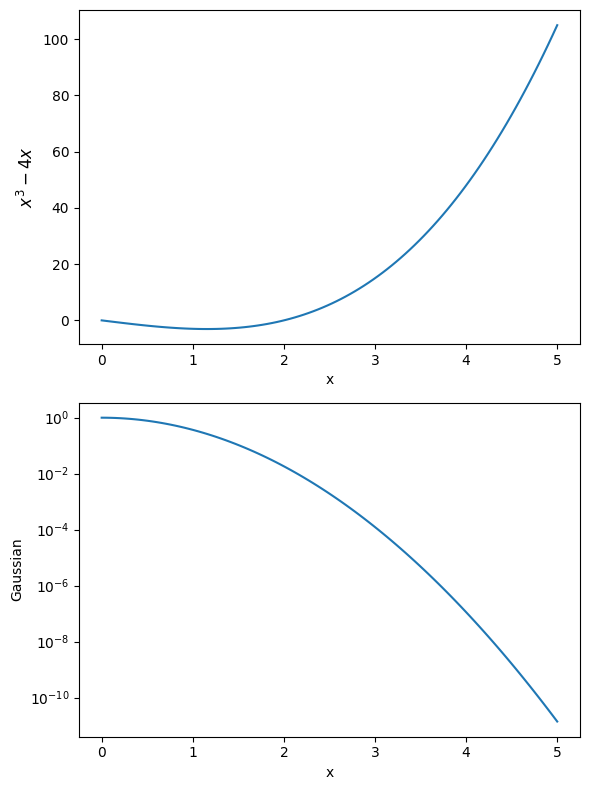

In [ ]:
fig = plt.figure()

ax1 = fig.add_subplot(211) 

x = np.linspace(0,5,100)
ax1.plot(x, x**3 - 4*x)
ax1.set_xlabel("x")
ax1.set_ylabel(r"$x^3 - 4x$", fontsize="large")

ax2 = fig.add_subplot(212)

ax2.plot(x, np.exp(-x**2))
ax2.set_xlabel("x")
ax2.set_ylabel("Gaussian")

# log scale
ax2.set_yscale("log")

# set the figure size
fig.set_size_inches(6, 8)

# tight_layout() makes sure things don't overlap
fig.tight_layout()

Assim, o comando *subplot* pode ser utilizado para dividir a figura em vários gráficos organizados em uma grade. Os dois primeiros argumentos definem uma grade com um número específico de linhas e colunas, enquaunto que o terceiro argumento indica qual gráfico ocupará uma posição específica dentro dessa grade. O número do gráfico varia de 1 até o produto de `num_linhas` e `num_colunas`. 

Esse comando também pode ser utilizado com os três parâmetros separados por vírgulas. Por exemplo, `subplot(211)` é equivalente a `subplot(2, 1, 1)`. 

Vale destacar que, quando o produto de `num_linhas` e `num_colunas` for 10 ou mais, a utilização de vírgulas entre os parâmetros torna-se obrigatória.


Após introduzirmos a primeira forma de criar múltiplos gráficos utilizando `add_subplot()`, podemos explorar uma segunda abordagem, que é o método `plt.subplots()`. Essa abordagem é um pouco mais direta e permite maior flexibilidade, especialmente quando estamos lidando com um número maior de subgráficos.

O método `plt.subplots()` cria uma figura e retorna um array de eixos, permitindo que você manipule facilmente múltiplos subgráficos em uma única linha de código. Aqui está como ele funciona:

``fig, ax = plt.subplots(ncols=1, nrows=2)``

Neste caso, a função `plt.subplots()` cria uma figura (`fig`) com subgráficos organizados em uma grade de 2 linhas e 1 coluna, retornando um array de eixos (`ax`). Para acessar o primeiro gráfico, usamos `ax[0]`, e para o segundo gráfico, usamos `ax[1]`.


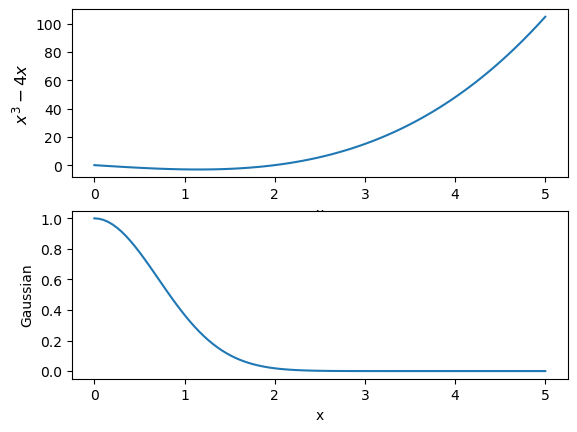

In [ ]:
fig, ax = plt.subplots(ncols=1, nrows=2)


x = np.linspace(0,5,100)
ax[0].plot(x, x**3 - 4*x)
ax[0].set_xlabel("x")
ax[0].set_ylabel(r"$x^3 - 4x$", fontsize="large")

ax[1].plot(x, np.exp(-x**2))
ax[1].set_xlabel("x")
ax[1].set_ylabel("Gaussian")

plt.show()



# Dimensão da Figura

No Matplotlib, o tamanho da figura é um aspecto importante para a visualização adequada dos gráficos. Abaixo, vamos aprender como modificar o tamanho da figura de forma simples e eficiente.


O método mais comum para alterar o tamanho da figura no Matplotlib é utilizando o parâmetro `figsize` ao criar uma nova figura com `plt.figure()` ou ao usar `plt.subplots()`.

Sua sintaxes consistem em

```fig = plt.figure(figsize=(largura, altura))```

ou


``` fig, ax = plt.subplots(figsize=(largura, altura)) ```

Aqui, **largura** e **altura** são valores em polegadas que definem o tamanho da figura.  O padrão é ``figsize=(6.4, 4.8)``.

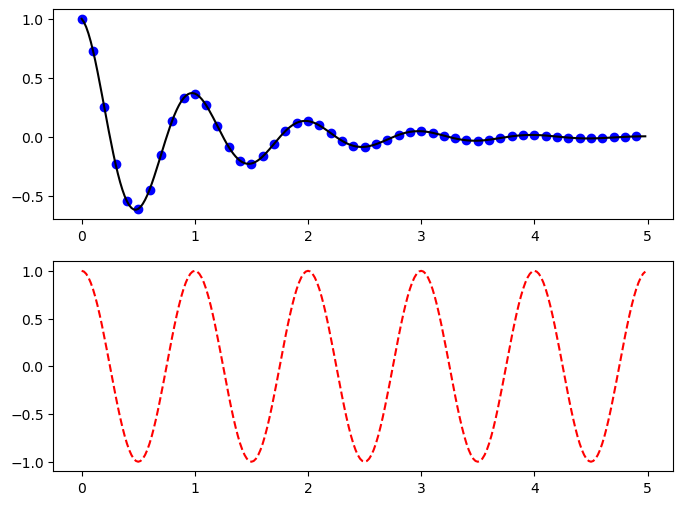

In [ ]:
# Cria uma figura com tamanho de 8x6 polegadas
fig = plt.figure(figsize=(8, 6))

def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.subplot(211)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()

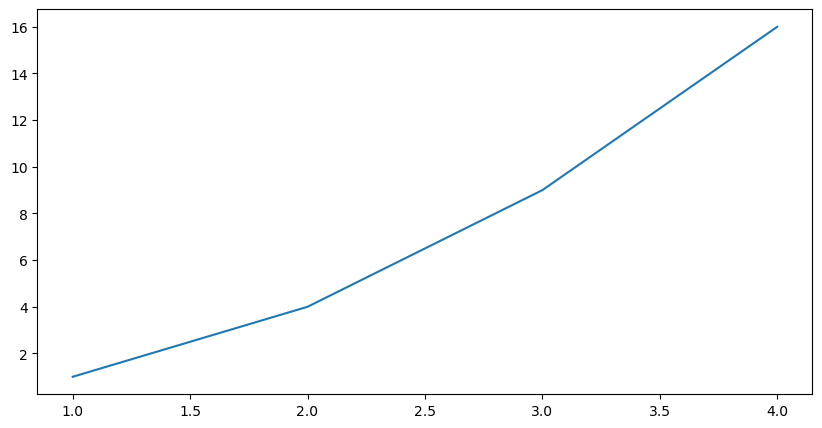

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))

# Cria um gráfico
ax.plot([1, 2, 3, 4], [1, 4, 9, 16])

# Exibe o gráfico
plt.show()

```{attention}
O tamanho da figura não deve ser confundido com a resolução. A resolução pode ser controlada através do parâmetro dpi (dots per inch).
```

Por exemplo, se você quiser uma figura de 800x600 pixels com dpi=100, você pode fazer:

``fig = plt.figure(figsize=(8, 6), dpi=100)``

Ao salvar figuras com savefig(), o tamanho da figura também pode ser ajustado, garantindo que o gráfico seja exportado com o tamanho adequado.

``
plt.savefig('grafico.png', figsize=(10, 7))
 ``

bem como o dpi

``
plt.savefig('grafico.png', dpi=200)
 ``